异常检测实战
1. 基于数据、可视化数据分布情况，及其对应高斯分布的概率密度函数
2. 建立模型，实测异常数据点预测
3. 可视化异常检测处理结果
4. 修改概率分布阈值，查看对结果的影响

In [4]:
#load data
import pandas as pd 
import numpy as np

data = pd.read_csv('anomaly_dataset_no_label.csv')
data.head()

,x1,x2
0,51.672284,49.120571
1,49.722262,50.852081
2,51.224833,47.091595
3,54.913455,52.117995
4,54.169611,47.676914


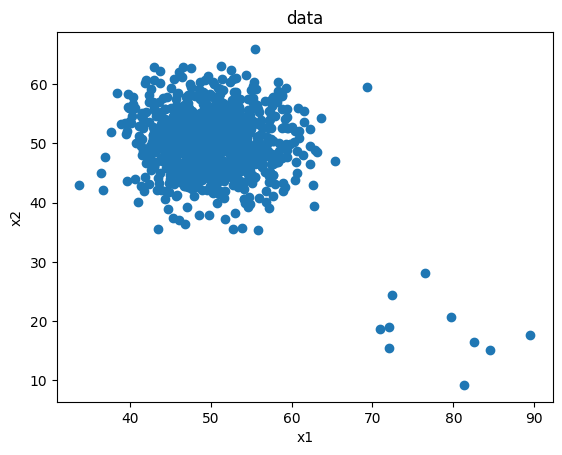

In [5]:
#visualize the data
from matplotlib import pyplot as plt 
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

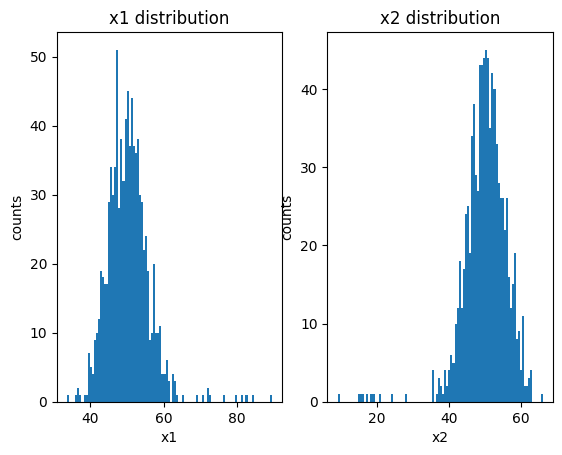

In [7]:
x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']

fig2 = plt.figure()
plt.subplot(121)
plt.hist(x1, bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(x2, bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()



In [8]:
#calculate the mean and sigma of x1 and x2

x1_mean = x1.mean()
x1_sigma = x1.std()

x2_mean = x2.mean()
x2_sigma = x2.std()

print(x1_mean, x1_sigma, x2_mean, x2_sigma)

50.4003709105114 5.723553605524595 50.03746346008208 5.992784746728053


In [12]:
#calculate the gaussian distribution p(x)

from scipy.stats import norm
x1_range = np.linspace(0, 80, 300)
#print(x1_range)
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)
print(x1_normal)

x2_range = np.linspace(0, 80, 300)
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

[1.01216980e-18 1.52599549e-18 2.29564153e-18 3.44592518e-18
 5.16129354e-18 7.71369075e-18 1.15031514e-17 1.71167928e-17
 2.54143436e-17 3.76518526e-17 5.56601984e-17 8.21020680e-17
 1.20841022e-16 1.77470279e-16 2.60068540e-16 3.80277784e-16
 5.54836517e-16 8.07755766e-16 1.17339989e-15 1.70083807e-15
 2.45997582e-15 3.55017414e-15 5.11233638e-15 7.34581749e-15
 1.05320229e-14 1.50672641e-14 2.15083926e-14 3.06360278e-14
 4.35419529e-14 6.17496214e-14 8.73799197e-14 1.23378626e-13
 1.73827774e-13 2.44370823e-13 3.42791846e-13 4.79802560e-13
 6.70109209e-13 9.33855237e-13 1.29856735e-12 1.80177412e-12
 2.49452097e-12 3.44607655e-12 4.75021896e-12 6.53361115e-12
 8.96693221e-12 1.22796344e-11 1.67794582e-11 2.28781750e-11
 3.11254592e-11 4.22533460e-11 5.72344339e-11 7.73578916e-11
 1.04328462e-10 1.40395094e-10 1.88517645e-10 2.52582365e-10
 3.37679732e-10 4.50461740e-10 5.99600204e-10 7.96373100e-10
 1.05541276e-09 1.39565811e-09 1.84156348e-09 2.42462898e-09
 3.18533298e-09 4.175565

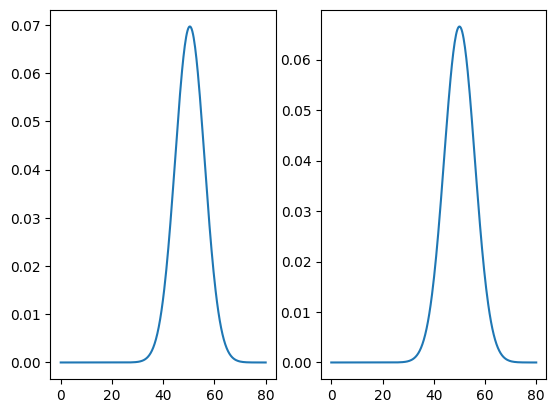

In [13]:
#show
fig2 = plt.figure()
plt.subplot(121)
plt.plot(x1_range, x1_normal)
plt.subplot(122)
plt.plot(x2_range, x2_normal)

In [ ]:
#establish model 高斯分布异常检测模型
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.1
,random_state,None


In [16]:
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    819
-1     91
Name: count, dtype: int64


/tmp/ipykernel_11897/4242874316.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict))


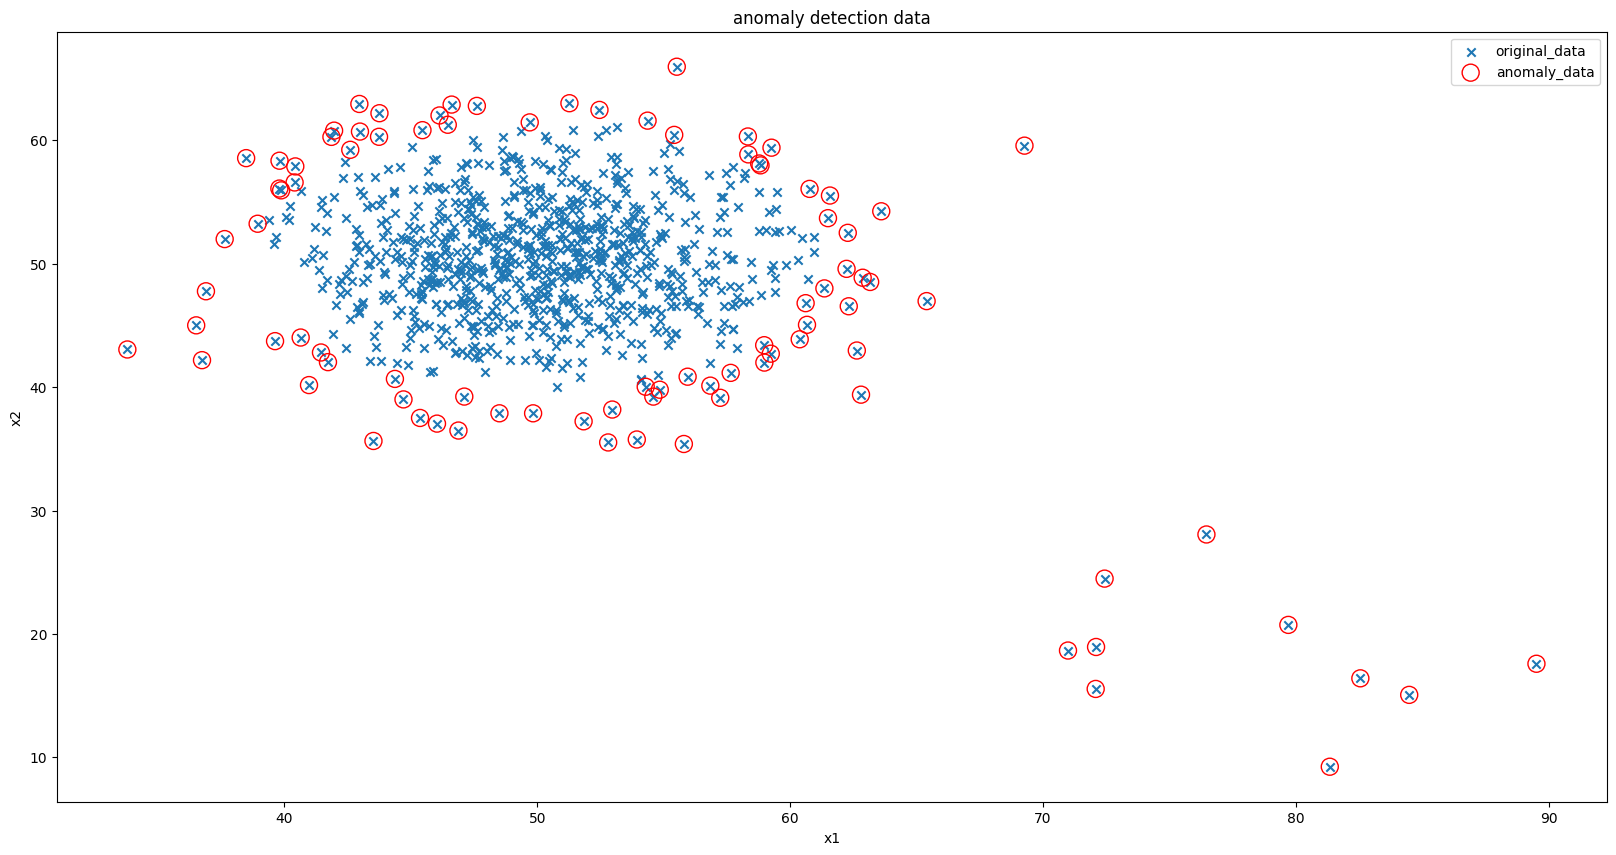

In [21]:
#show the result
from matplotlib import pyplot as plt 
fig4 = plt.figure(figsize=(20,10))
original_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'],marker='x')
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict == -1], data.loc[:, 'x2'][y_predict == -1],marker='o', facecolor='none',edgecolor='red',s=150)
plt.title('anomaly detection data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original_data, anomaly_data), ('original_data','anomaly_data'))
plt.show()

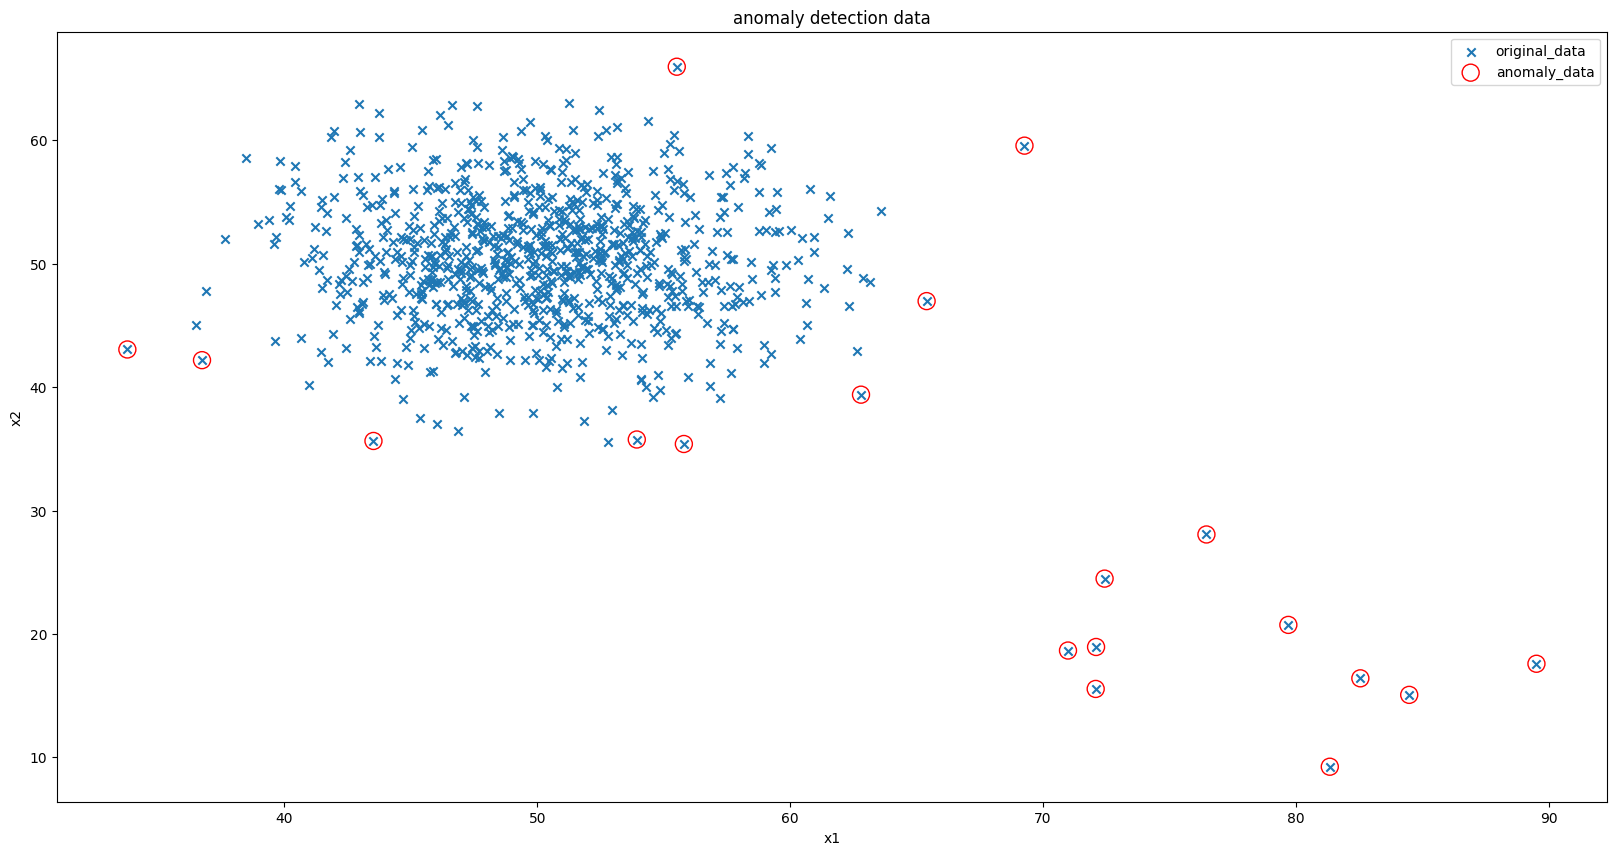

In [ ]:
#修改概率密度阈值contamination，用于调整异常点检测灵敏度
ad_model2 = EllipticEnvelope(contamination=0.02)
ad_model2.fit(data)
y_predict = ad_model2.predict(data)

fig5 = plt.figure(figsize=(20,10))
original_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'],marker='x')
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict == -1], data.loc[:, 'x2'][y_predict == -1],marker='o', facecolor='none',edgecolor='red',s=150)
plt.title('anomaly detection data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original_data, anomaly_data), ('original_data','anomaly_data'))
plt.show()